## **Essential Modules**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy.stats import spearmanr, pearsonr
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_regression

In [69]:
face_book_metrices = pd.read_csv('/content/dataset_Facebook.csv', delimiter = ';')
face_book_metrices.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [70]:
face_book_metrices.tail(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
490,85979,Photo,3,1,6,11,0.0,5280,8703,951,911,1237,5757,3300,431,1,79.0,30.0,110
491,85979,Photo,3,1,6,3,1.0,6184,10228,956,901,1140,6085,3502,437,1,105.0,46.0,152
492,85979,Link,1,1,5,11,0.0,45920,5808,753,655,763,15766,10720,220,0,128.0,9.0,137
493,85093,Photo,3,1,1,2,0.0,8412,13960,1179,1111,1632,8632,5348,699,17,185.0,55.0,257
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


## **Explore Data And Anlysis**

In [71]:
#inspect the columns of the data
face_book_metrices.info()
#note: (
    #Lifetime Post Total Reach, Lifetime Post Total Impressions, Lifetime Engaged Users, Lifetime Post Consumers, Lifetime Post Consumptions,
    #Lifetime Post Impressions by people who have liked your Page, Lifetime Post reach by people who like your Page ,
    #Lifetime People who have liked your Page and engaged with your post, comment, like, share)
# are not a possible input to predict the total transaction for a post before it is actually posted so we will need to drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [72]:
#check for na values
face_book_metrices.isna().sum()
#note: will need to impute nan values in the paid colums with a calculated value

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [73]:
#show basic stats of the data
face_book_metrices.describe()
#note: values of each column have great range differences which why we will need to standrize it

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [74]:
#check for duplicated rows in the dataset
face_book_metrices.duplicated().sum()

0

<ipython-input-75-dc009d49bf9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(face_book_metrices.corr(), annot=True,cbar=False)


<Axes: >

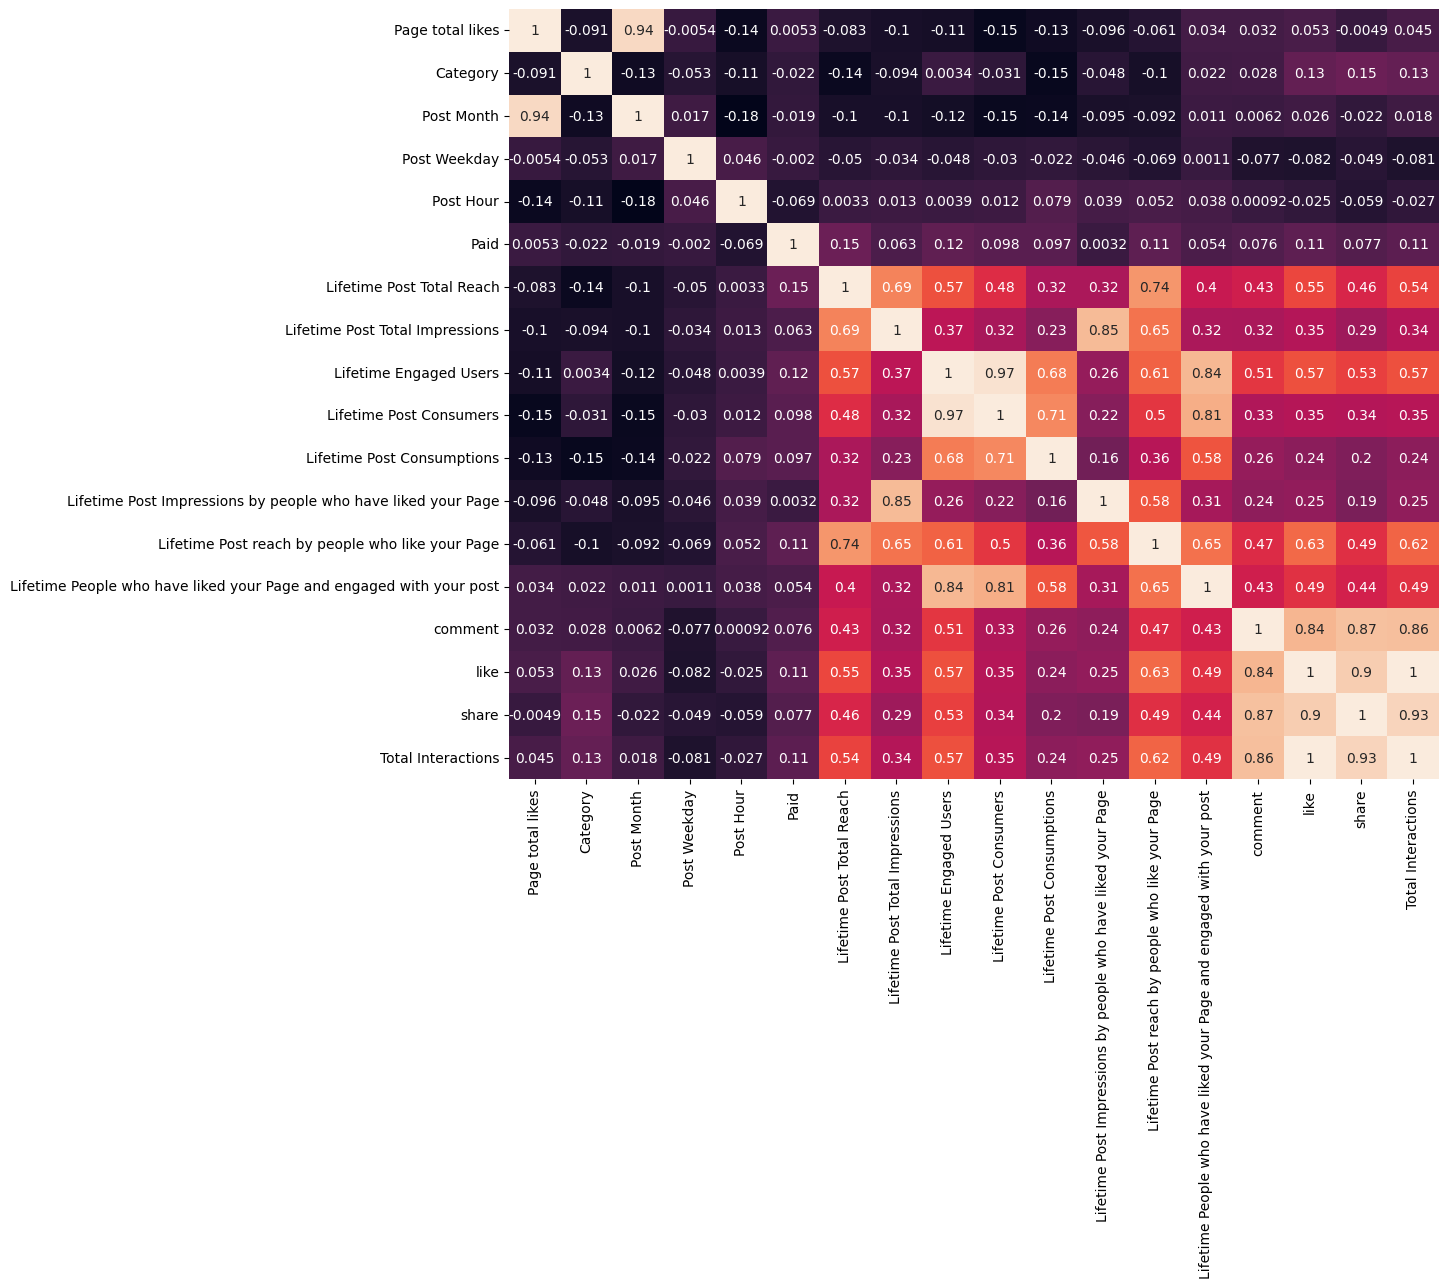

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(face_book_metrices.corr(), annot=True,cbar=False)

<Axes: title={'center': 'Page total likes'}, ylabel='Frequency'>

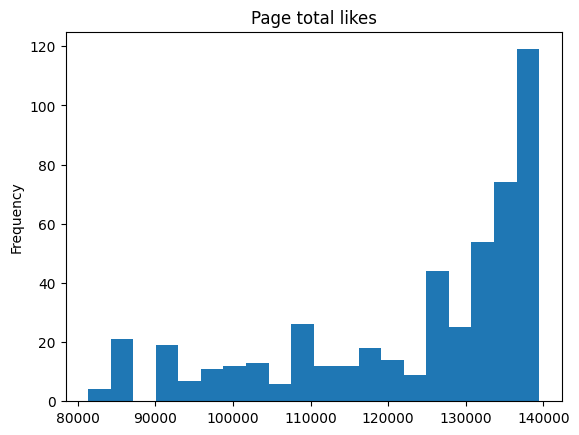

In [76]:
face_book_metrices['Page total likes'].plot(kind='hist', bins=20, title='Page total likes')
#note: the data values are right skewed a transformation must be applied the values are also really large(we can take the log if we want to)
 #(we will consider fixing the skewness if we are not satisfied with the model accuracy)

In [77]:
face_book_metrices['Page total likes'] = np.log(face_book_metrices['Page total likes'])

In [78]:
face_book_metrices['Type'].value_counts() #Link/ Photo/ Status/ Video

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [79]:
face_book_metrices['Category'].value_counts() #action/ product/ inspiration

1    215
3    155
2    130
Name: Category, dtype: int64

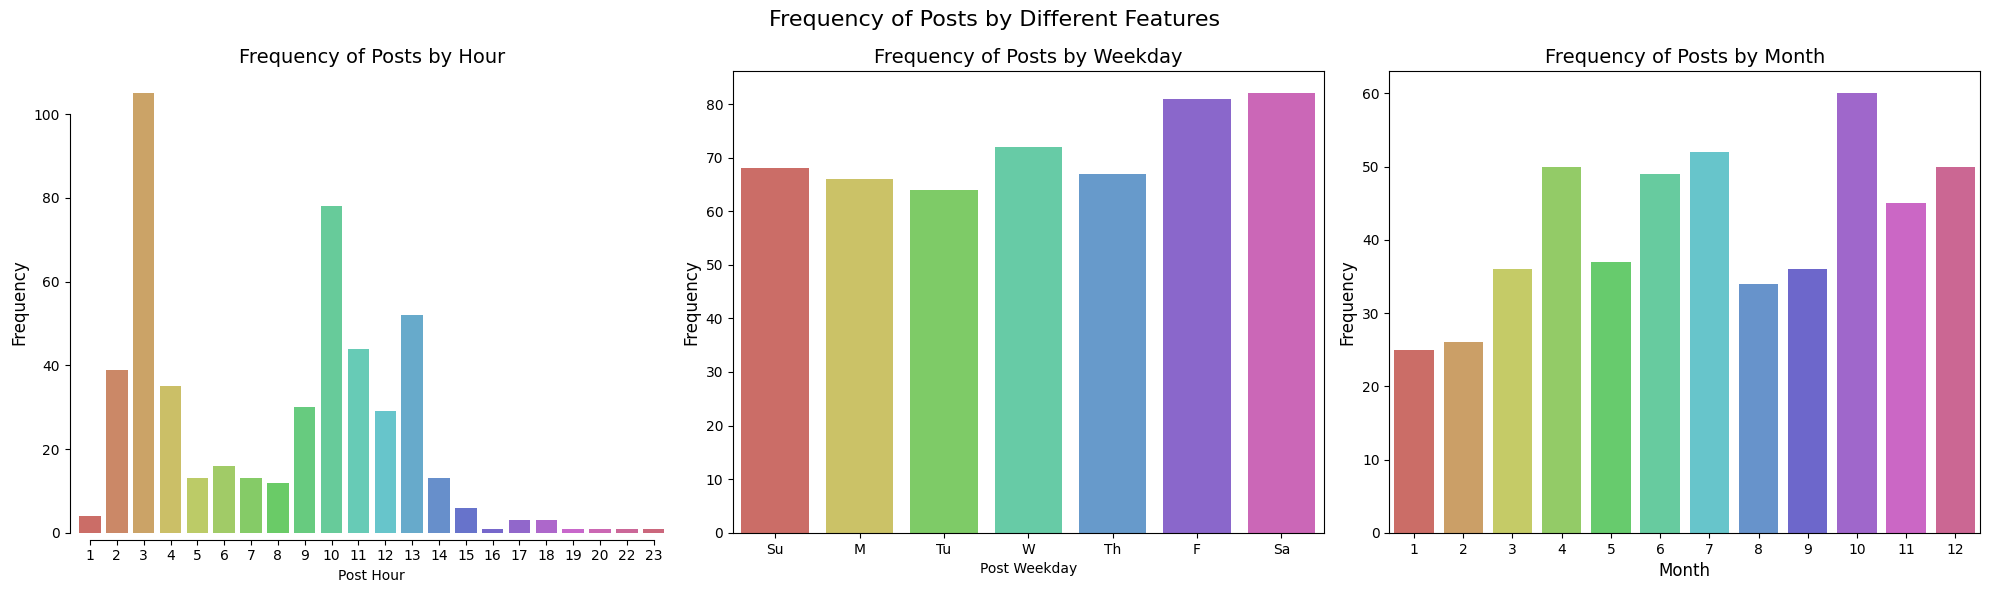

In [80]:
#how many post are there per time unit
# Hour
ffig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Hour
sns.countplot(ax=axes[0], x="Post Hour", data=face_book_metrices, palette="hls")
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Frequency of Posts by Hour", fontsize=14)
sns.despine(ax=axes[0], offset=5, trim=True)

# Weekday
sns.countplot(ax=axes[1], x="Post Weekday", data=face_book_metrices, palette="hls")
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Frequency of Posts by Weekday", fontsize=14)
handles = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
labels = [0, 1, 2, 3, 4, 5, 6]
axes[ 1].set_xticks(labels, handles)


# Month
sns.countplot(ax=axes[2], x="Post Month", data=face_book_metrices, palette="hls")
axes[2].set_xlabel("Month", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)
axes[2].set_title("Frequency of Posts by Month", fontsize=14)

# Suptitle and tight layout
plt.suptitle("Frequency of Posts by Different Features", fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Frequency of Posts by Category')

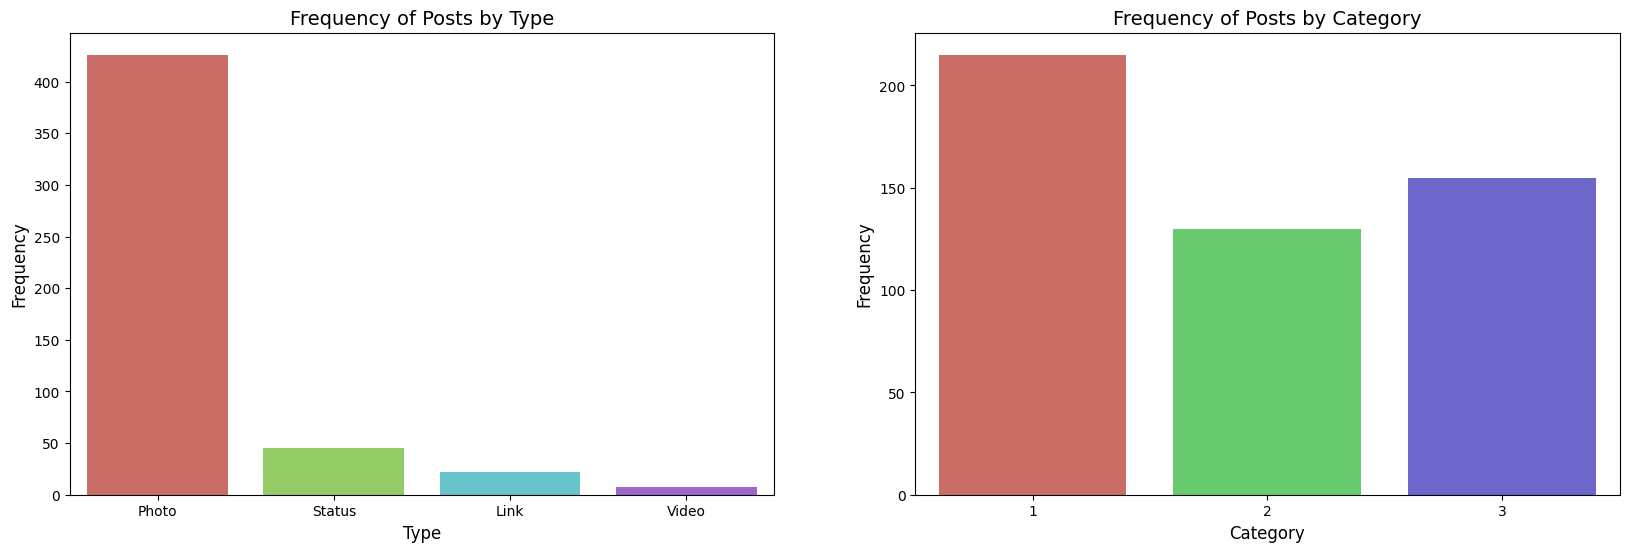

In [81]:
ffig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Type
sns.countplot(ax=axes[0], x="Type", data=face_book_metrices, palette="hls")
axes[0].set_xlabel("Type", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Frequency of Posts by Type", fontsize=14)

# Category
sns.countplot(ax=axes[1], x="Category", data=face_book_metrices, palette="hls")
axes[1].set_xlabel("Category", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Frequency of Posts by Category", fontsize=14)


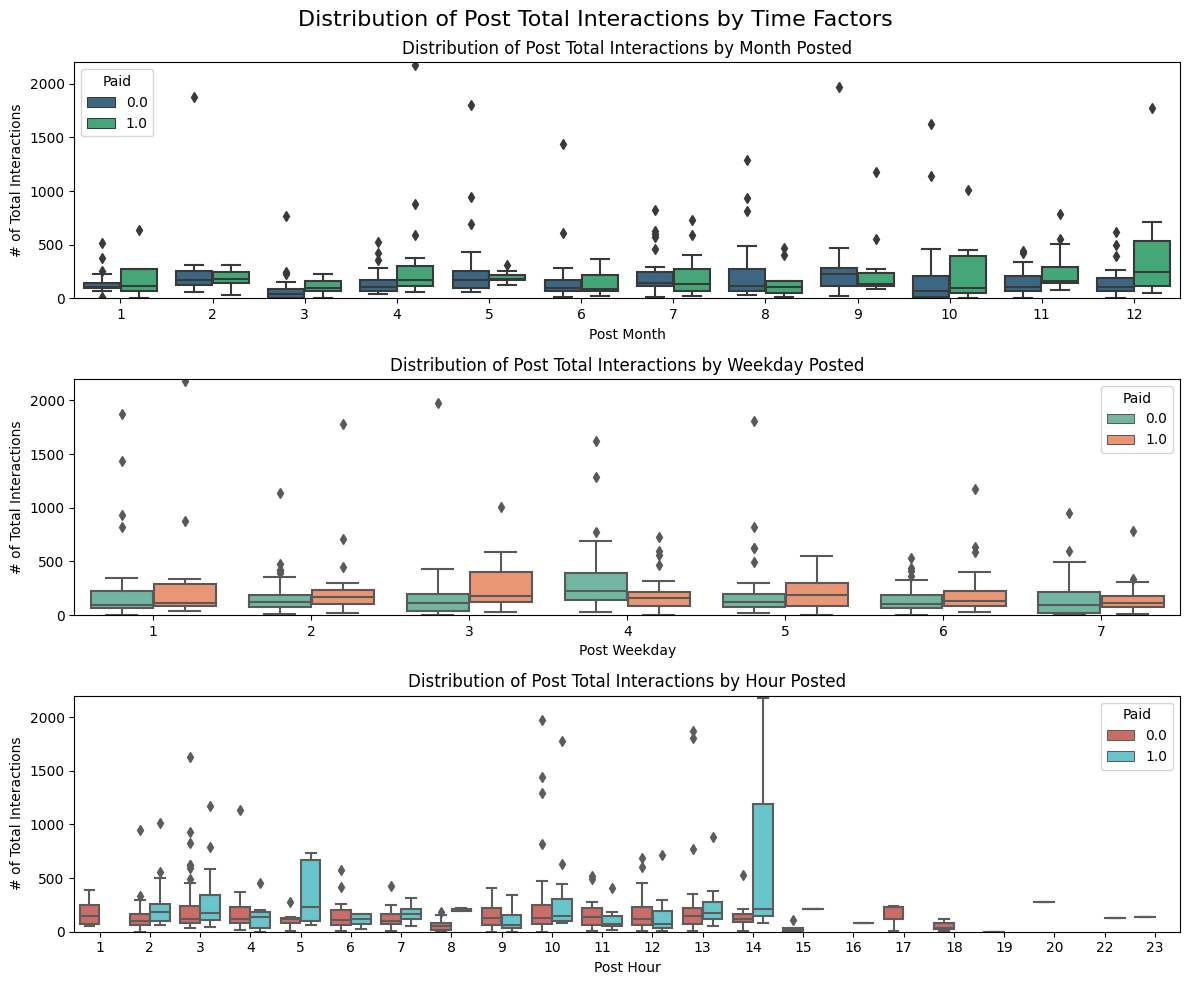

<Figure size 640x480 with 0 Axes>

In [82]:
#the distribution of total interaction each paid post vs non-paid post gets per specific time unit

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# First plot (already provided)
sns.boxplot(ax=axes[0], x="Post Month", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="viridis")
axes[0].set_ylim(0, 2200)
axes[0].set_title("Distribution of Post Total Interactions by Month Posted")
axes[0].set_ylabel("# of Total Interactions")

# Second plot (variation: using "Type" as hue)
sns.boxplot(ax=axes[1], x="Post Weekday", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="Set2")
axes[1].set_ylim(0, 2200)
axes[1].set_title("Distribution of Post Total Interactions by Weekday Posted")
axes[1].set_ylabel("# of Total Interactions")
# axes[1].legend(title="Type", loc="lower right")

# Third plot (variation: using "Category" as hue and different color palette)
sns.boxplot(ax=axes[2], x="Post Hour", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="hls")
axes[2].set_ylim(0, 2200)
axes[2].set_title("Distribution of Post Total Interactions by Hour Posted")
axes[2].set_ylabel("# of Total Interactions")
# axes[2].legend(title="Category", loc="lower right")

plt.suptitle("Distribution of Post Total Interactions by Time Factors", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("filename.png", dpi=300)



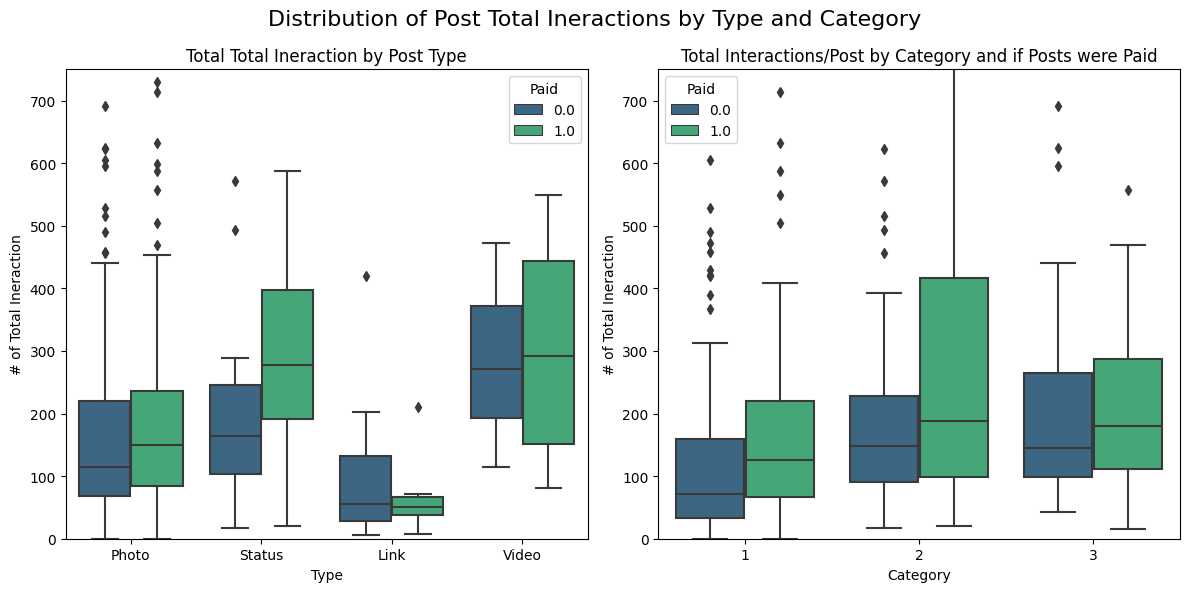

<Figure size 640x480 with 0 Axes>

In [83]:
#the distribution of total interaction each paid post vs non-paidbpost gets iper specific type/ category

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Type vs Likes
sns.boxplot(ax=axes[0], x="Type", y="Total Interactions", hue="Paid", data=face_book_metrices, palette="viridis")
axes[0].set_ylim(0, 750)
axes[0].set_title("Total Total Ineraction by Post Type")
axes[0].set_ylabel("# of Total Ineraction")
axes[0].legend(title="Paid", loc="upper right")


# Second plot: Category vs Likes
sns.boxplot(ax=axes[1], x="Category", y="Total Interactions", data=face_book_metrices, hue="Paid", palette="viridis")
axes[1].set_ylim(0, 750)
axes[1].set_xlabel("Category")
axes[1].set_ylabel("# of Total Ineraction")
axes[1].legend(title="Paid", loc="upper left")
axes[1].set_title("Total Interactions/Post by Category and if Posts were Paid")

plt.suptitle("Distribution of Post Total Ineractions by Type and Category", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("Distribution of Post Total Ineractions by Type and Category.png", dpi=300)

## **Data Preprocessing**

In [84]:
#impute the nan values in the paid coulmn
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
face_book_metrices['Paid'] = imputer.fit_transform(face_book_metrices[['Paid']])

In [85]:
#drop non needed columns
face_book_metrices.drop(face_book_metrices.iloc[:, 7:18], inplace = True, axis = 1)
face_book_metrices.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,11.845397,Photo,2,12,4,3,0.0,100
1,11.845397,Status,2,12,3,10,0.0,164
2,11.845397,Photo,3,12,3,3,0.0,80
3,11.845397,Photo,2,12,2,10,1.0,1777
4,11.845397,Photo,2,12,2,3,0.0,393
5,11.845397,Status,2,12,1,9,0.0,186
6,11.845397,Photo,3,12,1,3,1.0,279
7,11.845397,Photo,3,12,7,9,1.0,339
8,11.845397,Status,2,12,7,3,0.0,192
9,11.845397,Photo,3,12,6,10,0.0,142


In [86]:
def label_encoding(df, column_name):
    if column_name in df.columns:
        # Map the non-numeric column to numbers
        df[column_name] = pd.factorize(df[column_name], sort=True)[0]
    return df

In [87]:
label_encoding(face_book_metrices, 'Type')

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,11.845397,1,2,12,4,3,0.0,100
1,11.845397,2,2,12,3,10,0.0,164
2,11.845397,1,3,12,3,3,0.0,80
3,11.845397,1,2,12,2,10,1.0,1777
4,11.845397,1,2,12,2,3,0.0,393
...,...,...,...,...,...,...,...,...
495,11.351500,1,3,1,7,2,0.0,84
496,11.306762,1,2,1,5,8,0.0,75
497,11.306762,1,1,1,5,2,0.0,115
498,11.306762,1,3,1,4,11,0.0,136


In [88]:
outlierCut = np.percentile(face_book_metrices['Total Interactions'],90)
outlierCut

409.1

In [89]:
face_book_metrices = face_book_metrices[face_book_metrices['Total Interactions']<outlierCut]

Train a Lasso Regressor On (Page total likes,	Type,	Category,	Post Month,	Post Weekday,	Post Hour,	Paid,	Total Interactions) data

In [90]:
X = face_book_metrices.drop('Total Interactions', axis = 1)
y = face_book_metrices['Total Interactions']

In [91]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [92]:
lasso = linear_model.Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [93]:
y_predict = lasso.predict(X_test)
predicted_train = lasso.predict(X_train)
predicted_test = lasso.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test data R-2 score:',test_score)
print('Test data Spearman correlation:', spearman[0])
print('Test data Pearson correlation:', pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:', train_score)
print('Train data Spearman correlation:', spearmanTrain[0])
print('Train data Pearson correlation:', pearsonTrain[0])

Test data R-2 score: 0.08952576047368777
Test data Spearman correlation: 0.3309294773100265
Test data Pearson correlation: 0.32639330054429655
 
Train data R-2 score: 0.131233072972896
Train data Spearman correlation: 0.4023113889608613
Train data Pearson correlation: 0.36357547744654


In [94]:
# Define the cross-validation strategy
cv = KFold(n_splits=5)
# Perform cross-validation
scores = cross_val_score(lasso, X, y, cv=cv, scoring='r2')
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [ 0.09477196  0.14585018  0.02814292 -0.01890036  0.11199535]
Mean R^2 Score: 0.07237200986174888
Standard Deviation: 0.059594742294296774


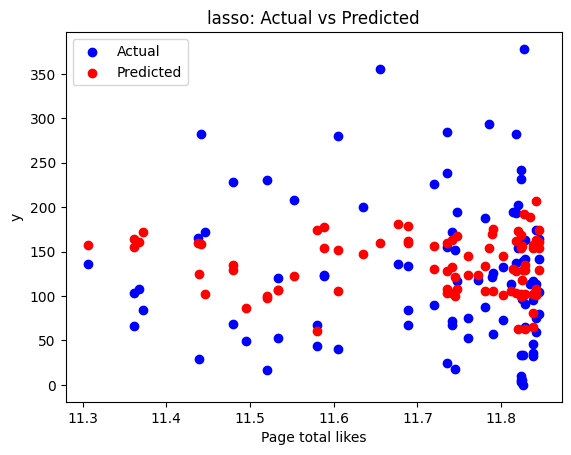

In [95]:
X_test_feature = X_test['Page total likes']
y_pred = lasso.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual')
plt.scatter(X_test_feature, y_pred, color='red', label='Predicted')
plt.xlabel('Page total likes')
plt.ylabel('y')
plt.title('lasso: Actual vs Predicted')
plt.legend()
plt.show()

The models scores are tramandously low so we will continue imporving data more

In [96]:
def Weekday(x):
    weekdays = {
        1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thrusday",
        6: "Friday",
        7: "Sauterday",
    }
    return weekdays[x]
face_book_metrices['Post Weekday'].apply(Weekday)

0      Wednesday
1        Tuesday
2        Tuesday
4         Monday
5         Sunday
         ...    
495    Sauterday
496     Thrusday
497     Thrusday
498    Wednesday
499    Wednesday
Name: Post Weekday, Length: 450, dtype: object

In [97]:
#span the months to a dataframe
months_df = pd.get_dummies(face_book_metrices['Post Month'],prefix='Mo')
face_book_metrices = pd.concat([face_book_metrices,months_df],axis=1)

In [98]:
#span the week days to a dataframe
days_df = pd.get_dummies(face_book_metrices['Post Weekday'], prefix='day')
face_book_metrices = pd.concat([face_book_metrices,days_df],axis=1)

In [99]:
#span the hours to a dataframe
hours_df = pd.get_dummies(face_book_metrices['Post Hour'],prefix='hour')
face_book_metrices = pd.concat([face_book_metrices,hours_df],axis=1)

In [100]:
#span the tpes to a data frame
types_df = pd.get_dummies(face_book_metrices['Type'], prefix='type')
face_book_metrices = pd.concat([face_book_metrices,types_df],axis=1)

In [101]:
#span the categroies to a dataframe
category_df = pd.get_dummies(face_book_metrices['Category'], prefix='category')
face_book_metrices = pd.concat([face_book_metrices,category_df],axis=1)

In [102]:
face_book_metrices.drop(["Post Month", "Post Weekday", "Post Hour", "Type", "Category"], axis=1, inplace=True)

In [103]:
face_book_metrices.columns

Index(['Page total likes', 'Paid', 'Total Interactions', 'Mo_1', 'Mo_2',
       'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10',
       'Mo_11', 'Mo_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_22', 'hour_23', 'type_0', 'type_1',
       'type_2', 'type_3', 'category_1', 'category_2', 'category_3'],
      dtype='object')

Experimenting again with the new dataset

In [104]:
X = face_book_metrices.drop('Total Interactions', axis = 1)
y = face_book_metrices['Total Interactions']

In [105]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [106]:
lasso = linear_model.Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [107]:
y_predict = lasso.predict(X_test)
predicted_train = lasso.predict(X_train)
predicted_test = lasso.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test data R-2 score:',test_score)
print('Test data Spearman correlation:', spearman[0])
print('Test data Pearson correlation:', pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:', train_score)
print('Train data Spearman correlation:', spearmanTrain[0])
print('Train data Pearson correlation:', pearsonTrain[0])

Test data R-2 score: 0.07986331674415514
Test data Spearman correlation: 0.3097165188878704
Test data Pearson correlation: 0.30043944534494876
 
Train data R-2 score: 0.18925916331149484
Train data Spearman correlation: 0.47736653996830647
Train data Pearson correlation: 0.4459418501308253


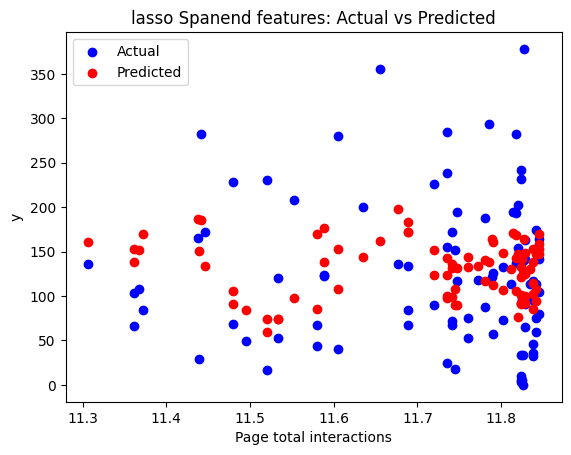

In [108]:
X_test_feature = X_test['Page total likes']
y_pred = lasso.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual')
plt.scatter(X_test_feature, y_pred, color='red', label='Predicted')
plt.xlabel('Page total interactions')
plt.ylabel('y')
plt.title('lasso Spanend features: Actual vs Predicted')
plt.legend()
plt.show()

In [109]:
# Define the cross-validation strategy
cv = KFold(n_splits=5)
# Perform cross-validation
scores = cross_val_score(lasso, X, y, cv=cv, scoring='r2')
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [ 0.04937209  0.09760918 -0.16067096  0.00630512  0.12398827]
Mean R^2 Score: 0.023320740713833853
Standard Deviation: 0.10047275405649939


there is a slight improvment from the last model no great change so we continu to feature selection

## **Feature Selection**

Set of features: The Pearson correlation coefficient. For pairs of features having a
correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity

<Axes: >

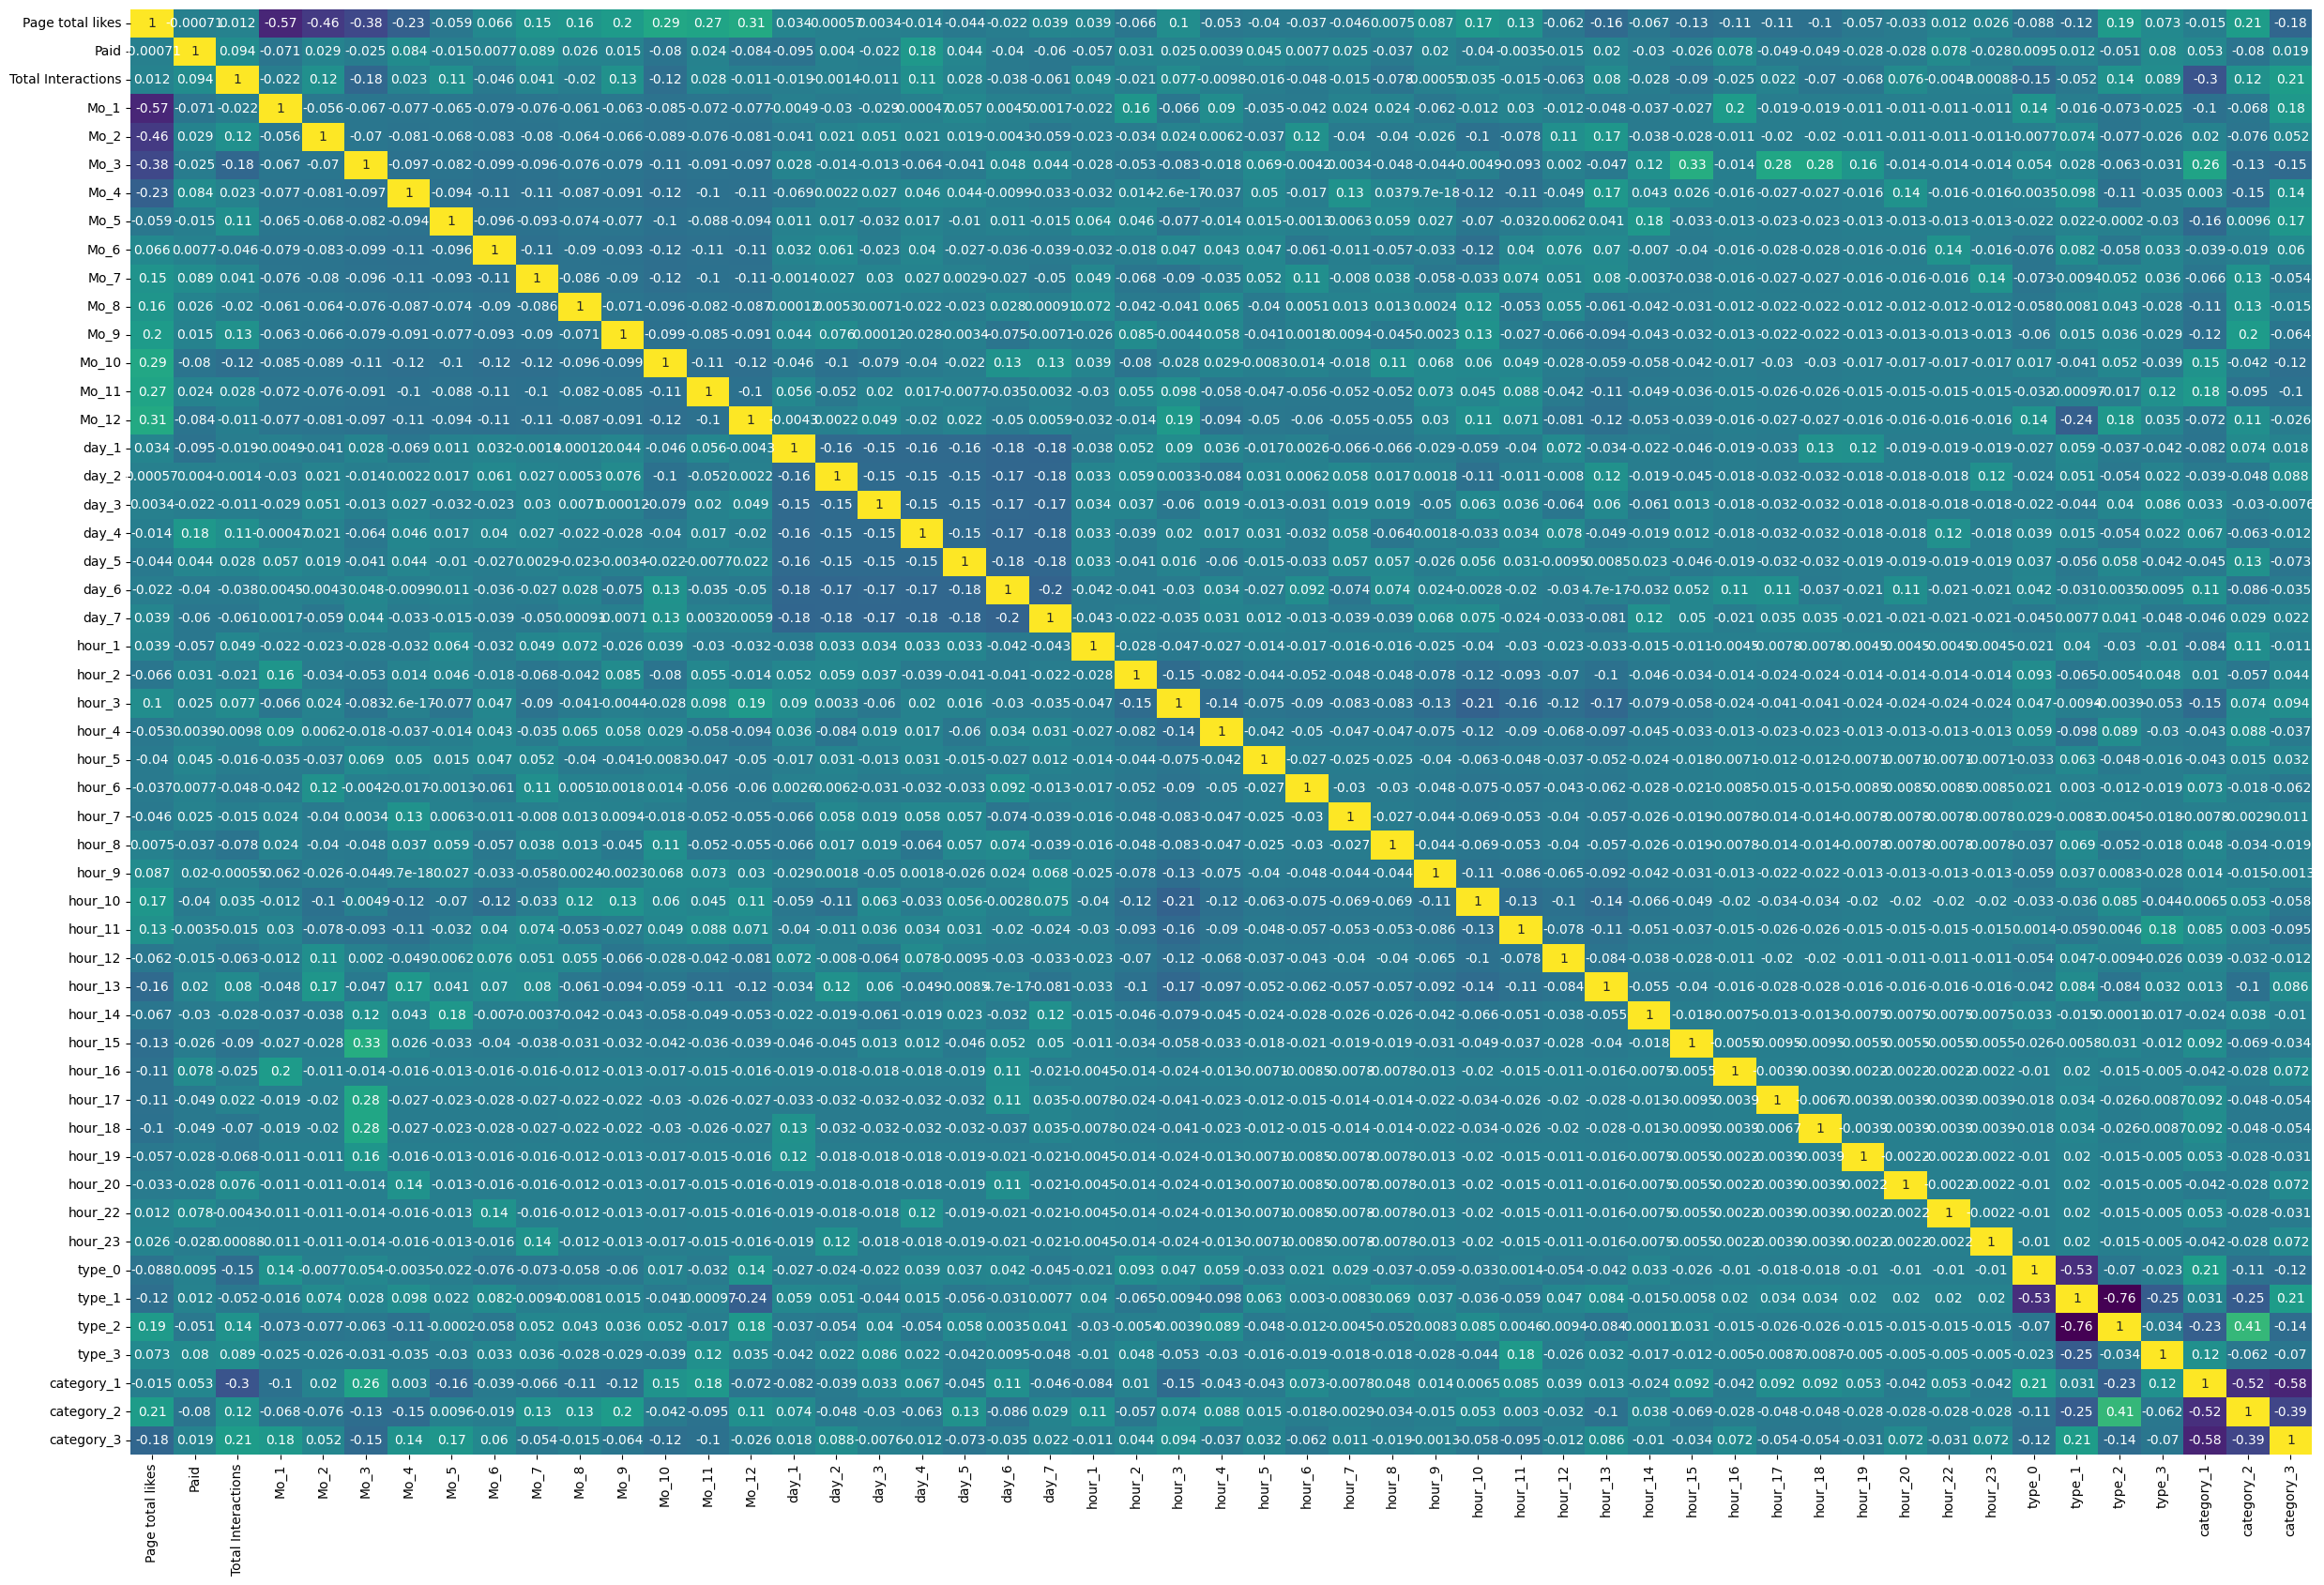

In [110]:
plt.figure(figsize=(30,20))
sns.heatmap(face_book_metrices.corr(),cmap='viridis',annot=True,cbar=False)

In [111]:
# Calculate the Pearson correlation matrix
corr_matrix = face_book_metrices.corr().abs()
# Calculate the Pearson correlation matrix
corr_matrix = face_book_metrices.corr().abs()
# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Find pairs of features with correlation coefficient > 0.8
high_corr_pairs = np.where(mask & (corr_matrix > 0.8))
# Set to store the features to drop
features_to_drop = set()
# Iterate over the indices of highly correlated feature pairs
for i, j in zip(*high_corr_pairs):
    if i != j:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        if feature_i not in features_to_drop:
            features_to_drop.add(feature_j)
# Drop the selected features from your dataset
face_book_metrices_pearson_filtered = face_book_metrices.drop(features_to_drop, axis=1)

In [112]:
face_book_metrices_pearson_filtered.columns

Index(['Page total likes', 'Paid', 'Total Interactions', 'Mo_1', 'Mo_2',
       'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10',
       'Mo_11', 'Mo_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_22', 'hour_23', 'type_0', 'type_1',
       'type_2', 'type_3', 'category_1', 'category_2', 'category_3'],
      dtype='object')

Decide On the most relevant features
a tree-based models, such as Random Forest or Gradient Boosting models. These models can provide a measure of feature importance based on how much each feature contributes to the overall predictive performance.

In [113]:
X = face_book_metrices_pearson_filtered.drop('Total Interactions', axis =1)
y = face_book_metrices_pearson_filtered['Total Interactions']
# Create a Random Forest model
RF_model = RandomForestRegressor()

# Fit the model on your data
RF_model.fit(X, y)

# Get the feature importances
importances = RF_model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

             Feature  Importance
0   Page total likes    0.211468
47        category_1    0.091106
1               Paid    0.049735
11             Mo_10    0.036586
17             day_4    0.034683
20             day_7    0.033378
30           hour_10    0.028784
16             day_3    0.027794
33           hour_13    0.025311
19             day_6    0.024600
14             day_1    0.024042
23            hour_3    0.023768
15             day_2    0.023415
18             day_5    0.023207
8               Mo_7    0.021432
24            hour_4    0.018922
29            hour_9    0.018839
12             Mo_11    0.018456
6               Mo_5    0.018101
3               Mo_2    0.018088
44            type_1    0.016738
31           hour_11    0.015436
46            type_3    0.014251
22            hour_2    0.014168
45            type_2    0.013570
10              Mo_9    0.013106
9               Mo_8    0.012674
4               Mo_3    0.012080
48        category_2    0.012031
32        

In [114]:
# Filter the features based on importance threshold
selected_features = feature_importances[feature_importances['Importance'] > 0.019]['Feature']
# Print the selected features/
final_features = list(selected_features)

In [115]:
final_dataframe = face_book_metrices_pearson_filtered[final_features]
final_dataframe['Total Interaction'] = face_book_metrices_pearson_filtered['Total Interactions']
final_dataframe.head()

<ipython-input-115-643615cf0727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['Total Interaction'] = face_book_metrices_pearson_filtered['Total Interactions']


,Page total likes,category_1,Paid,Mo_10,day_4,day_7,hour_10,day_3,hour_13,day_6,day_1,hour_3,day_2,day_5,Mo_7,Total Interaction
0,11.845397,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,100
1,11.845397,0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,164
2,11.845397,0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,80
4,11.845397,0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,393
5,11.845397,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,186


## **Model Selection**

## **Modeling**

In [116]:
X = final_dataframe.drop('Total Interaction', axis = 1)
y = final_dataframe['Total Interaction']

In [117]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)

In [118]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
y_predict = rf.predict(X_test)
predicted_train = rf.predict(X_train)
test_score = r2_score(y_test, y_predict)
spearman = spearmanr(y_test, y_predict)
pearson = pearsonr(y_test, y_predict)

print('Test data R-2 score:',test_score)
print('Test data Spearman correlation:', spearman[0])
print('Test data Pearson correlation:', pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:', train_score)
print('Train data Spearman correlation:', spearmanTrain[0])
print('Train data Pearson correlation:', pearsonTrain[0])

Test data R-2 score: 0.10447850711597195
Test data Spearman correlation: 0.4540554452459859
Test data Pearson correlation: 0.40222330230947456
 
Train data R-2 score: 0.8473572687823048
Train data Spearman correlation: 0.9441059245796775
Train data Pearson correlation: 0.9464178523985484


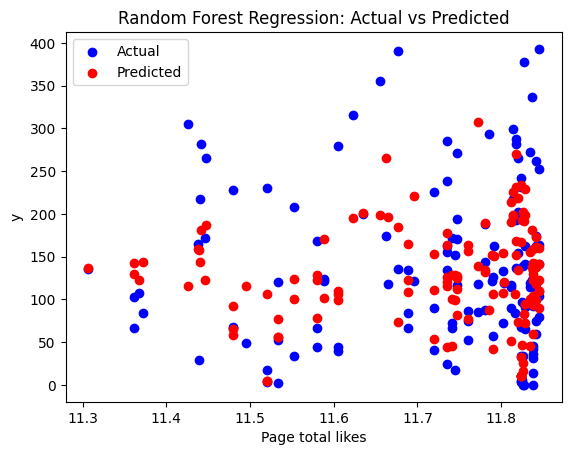

In [120]:
X_test_feature = X_test['Page total likes']
y_pred = rf.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual')
plt.scatter(X_test_feature, y_pred, color='red', label='Predicted')
plt.xlabel('Page total likes')
plt.ylabel('y')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [121]:
# Define the cross-validation strategy
cv = KFold(n_splits=5)
# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [-0.49644881  0.22173468 -0.18365453 -0.23377923 -0.20429034]
Mean R^2 Score: -0.17928764556633858
Standard Deviation: 0.2302275603892971


## **HyperParameter Tuning**

In [122]:
# Hyperparameter values to try
n_estimators_values = [100, 200, 300, 400, 500]
max_depth_values = [None, 5, 10]
min_samples_split_values = [2, 5, 10]

best_mse = float('inf')
best_params = {}

# Hyperparameter tuning with for loop
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Create and fit the random forest regressor
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
            model.fit(X_train, y_train)

            # Predict on the validation set
            y_pred = model.predict(X_test)

            # Calculate the mean squared error
            mse = mean_squared_error(y_test, y_pred)

            # Check if this model has the best performance so far
            if mse < best_mse:
                best_mse = mse
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)

Best Hyperparameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10}
Best MSE: 7058.771193050549


In [123]:
final_rf = RandomForestRegressor(n_estimators = 500,  min_samples_split = 10)
final_rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=500)

In [124]:
y_predict = final_rf.predict(X_test)
predicted_train = final_rf.predict(X_train)
test_score = r2_score(y_test, y_predict)
spearman = spearmanr(y_test, y_predict)
pearson = pearsonr(y_test, y_predict)

print('Test data R-2 score:',test_score)
print('Test data Spearman correlation:', spearman[0])
print('Test data Pearson correlation:', pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:', train_score)
print('Train data Spearman correlation:', spearmanTrain[0])
print('Train data Pearson correlation:', pearsonTrain[0])

Test data R-2 score: 0.1741620881204322
Test data Spearman correlation: 0.4705672175172756
Test data Pearson correlation: 0.4250385202527143
 
Train data R-2 score: 0.5426969049206576
Train data Spearman correlation: 0.7856019415269545
Train data Pearson correlation: 0.7723851104353857


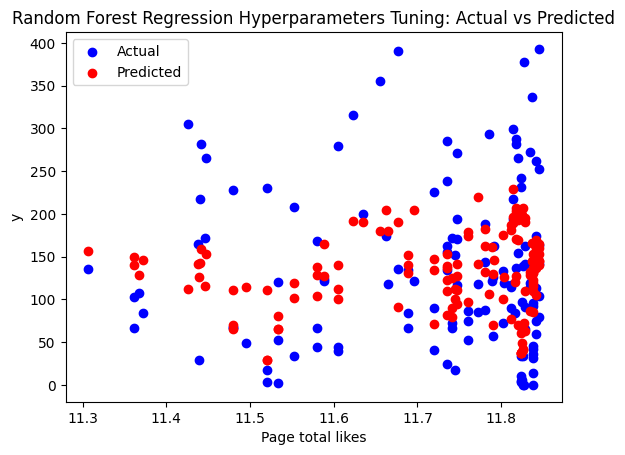

In [125]:
X_test_feature = X_test['Page total likes']
y_pred = final_rf.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual')
plt.scatter(X_test_feature, y_pred, color='red', label='Predicted')
plt.xlabel('Page total likes')
plt.ylabel('y')
plt.title('Random Forest Regression Hyperparameters Tuning: Actual vs Predicted')
plt.legend()
plt.show()

In [126]:
# Define the cross-validation strategy
cv = KFold(n_splits=5)
# Perform cross-validation
scores = cross_val_score(final_rf, X, y, cv=cv, scoring='r2')
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [-0.40489437  0.28374087 -0.09591988 -0.08934307 -0.03341702]
Mean R^2 Score: -0.06796669418150236
Standard Deviation: 0.2189294310176406


Given the model week performance after the feature engineering, the different models experimentations and the hyperparameter fine tuning.
One could chose the model that best genralizes to the data but my own opinion is that the data is not a good representation for the target.

In [136]:
import itertools

months_combinations = ['Mo_1', 'Mo_2', 'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10', 'Mo_11', 'Mo_12']

# Generate all possible two-month combinations
two_month_combinations = list(itertools.combinations(months_combinations, 2))

# Generate all possible three-month combinations
three_month_combinations = list(itertools.combinations(months_combinations, 3))

In [137]:
for combination in two_month_combinations:
  face_book_metrices[''.join(combination)] = (face_book_metrices[combination[0]] + face_book_metrices[combination[1]] >= 1).astype(int)

for combination in three_month_combinations:
  face_book_metrices[''.join(combination)] = (face_book_metrices[combination[0]] + face_book_metrices[combination[1]] + face_book_metrices[combination[2]]>= 1).astype(int)

<ipython-input-137-05ecd30525eb>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  face_book_metrices[''.join(combination)] = (face_book_metrices[combination[0]] + face_book_metrices[combination[1]] + face_book_metrices[combination[2]]>= 1).astype(int)
<ipython-input-137-05ecd30525eb>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  face_book_metrices[''.join(combination)] = (face_book_metrices[combination[0]] + face_book_metrices[combination[1]] + face_book_metrices[combination[2]]>= 1).astype(int)
<ipython-input-137-05ecd30525e

In [138]:
X_combinations = face_book_metrices.drop('Total Interactions', axis = 1)
y_combinations = face_book_metrices['Total Interactions']

In [139]:
X_train, X_test,y_train, y_test = train_test_split(X_combinations, y_combinations, test_size=0.3,random_state=50)

In [140]:
# Create a Random Forest model
RF_combination_model = RandomForestRegressor()

# Fit the model on your data
RF_combination_model.fit(X_train, y_train)

# Get the feature importances
importances = RF_combination_model.feature_importances_

# Create a DataFrame to store the feature importances
feature_combination_importances = pd.DataFrame({'Feature': X_combinations.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_combination_importances = feature_combination_importances.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_combination_importances)

             Feature  Importance
0   Page total likes    0.128085
47        category_1    0.075737
1               Paid    0.044320
30           hour_10    0.035078
19             day_6    0.031599
..               ...         ...
61          Mo_2Mo_3    0.000011
91          Mo_5Mo_9    0.000004
40           hour_20    0.000000
39           hour_19    0.000000
36           hour_16    0.000000

[336 rows x 2 columns]


In [141]:
y_predict = RF_combination_model.predict(X_test)
predicted_train = RF_combination_model.predict(X_train)
test_score = r2_score(y_test, y_predict)
spearman = spearmanr(y_test, y_predict)
pearson = pearsonr(y_test, y_predict)

print('Test data R-2 score:',test_score)
print('Test data Spearman correlation:', spearman[0])
print('Test data Pearson correlation:', pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:', train_score)
print('Train data Spearman correlation:', spearmanTrain[0])
print('Train data Pearson correlation:', pearsonTrain[0])

Test data R-2 score: 0.15631426993414654
Test data Spearman correlation: 0.4708951099050318
Test data Pearson correlation: 0.42958383372582043
 
Train data R-2 score: 0.852638688024192
Train data Spearman correlation: 0.947506700763783
Train data Pearson correlation: 0.9521682467472733


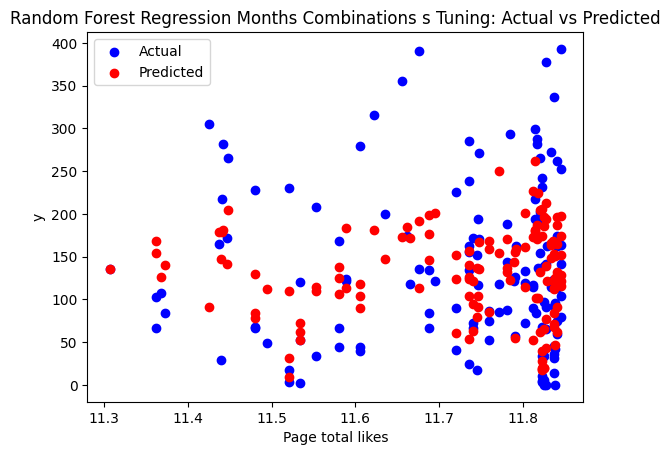

In [132]:
X_test_feature = X_test['Page total likes']
y_pred = RF_combination_model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(X_test_feature, y_test, color='blue', label='Actual')
plt.scatter(X_test_feature, y_pred, color='red', label='Predicted')
plt.xlabel('Page total likes')
plt.ylabel('y')
plt.title('Random Forest Regression Months Combinations s Tuning: Actual vs Predicted')
plt.legend()
plt.show()